<a href="https://colab.research.google.com/github/lenaphamthi/bai_tap_thong_ke/blob/main/TKMT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sử dụng thư viện pandas để quản lý và phân tích dữ liệu

In [ ]:
import pandas as pd


Đọc tập dữ liệu state.csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ndhcuong/ptdlk2/main/state.csv")

Hiển thị các thông số cơ bản của tập dữ liệu

In [ ]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
df.shape

(50, 4)

Ghi chú: Nếu có cột dữ liệu ID/STT thì loại bỏ cột này vì không có ý nghĩa khi phân tích dữ liệu

PHÂN TÍCH DỮ LIỆU ĐỊNH LƯỢNG

Sao chép các cột dữ liệu định lượng sang 1 dataframe khác (Khi thành thạo có thể không cần thực hiện thao tác sao chép này)

In [ ]:
df_dl = pd.DataFrame(columns = ["Population","Murder.Rate"], data = df)
df_dl.head()

,Population,Murder.Rate
0,4779736,5.7
1,710231,5.6
2,6392017,4.7
3,2915918,5.6
4,37253956,4.4


In [ ]:
df_dl.shape

(50, 2)

Tính các thông số thống kê định lượng

In [ ]:
print("Giá trị trung bình : ", df_dl["Population"].mean(), ";", df_dl["Murder.Rate"].mean())


Giá trị trung bình :  6162876.3 ; 4.066


In [ ]:
print("Giá trị lớn nhất :",df_dl["Population"].max(),";",df_dl["Murder.Rate"].max())

Giá trị lớn nhất : 37253956 ; 10.3


In [ ]:
print("Giá trị nhỏ nhất :",df_dl["Population"].min(),";",df_dl["Murder.Rate"].min())

Giá trị nhỏ nhất : 563626 ; 0.9


In [ ]:
print('Độ lệch chuẩn: ', df_dl['Population'].std(), "; ", df_dl['Murder.Rate'].std())


Độ lệch chuẩn:  6848235.347401142 ;  1.915736124302923


In [ ]:
print('Phương sai: ', df_dl['Population'].var(), "; ", df_dl['Murder.Rate'].var())


Phương sai:  46898327373394.445 ;  3.670044897959184


In [ ]:
print('Q1 của  Population', df_dl['Population'].quantile(0.25), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.25))


Q1 của  Population 1833004.25 ; của Murder.Rate 2.425


In [ ]:
print('Q2 của  Population', df_dl['Population'].quantile(0.50), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.50))


Q2 của  Population 4436369.5 ; của Murder.Rate 4.0


In [ ]:
print('Q3 của  Population', df_dl['Population'].quantile(0.75), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.75))


Q3 của  Population 6680312.25 ; của Murder.Rate 5.55


In [ ]:
print('IQR ',df_dl['Population'].quantile(0.75) - df_dl['Population'].quantile(0.25), "; ", df_dl['Murder.Rate'].quantile(0.75) - df_dl['Murder.Rate'].quantile(0.25) )


IQR  4847308.0 ;  3.125


Có thể thay các phép tính riêng biệt trên bằng cách sử dụng hàm describe



In [ ]:
df_dl.describe()


,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


Mô tả trực quan hóa dữ liệu định lượng



In [ ]:
import matplotlib.pyplot as plt

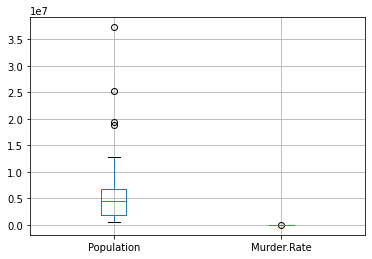

In [ ]:
boxplot = df_dl.boxplot(column=['Population', 'Murder.Rate'])

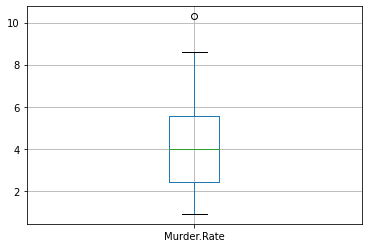

In [ ]:
df_dl.boxplot(column=['Murder.Rate']);

Xem xét mối quan hệ giữa 2 biến định lượng có thể sử dụng công cụ trực quan scatterplot



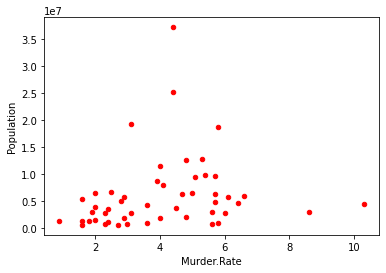

In [ ]:
sc = df_dl.plot.scatter(x ='Murder.Rate', y = 'Population', c = 'Red')


Mối quan hệ giữa 2 cột dữ liệu định lượng còn được biểu hiện qua hệ số tương quan (correlation). Trong pandas có thể tính hệ số này như sau:

In [ ]:
df_dl.corr(method='pearson')


,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


BÀI TẬP: Bạn hãy tìm hiểu về hệ số tương quan (correlation), cách đọc và giải thích ý nghĩa hệ số tương quan.

Câu trả lời:
1. Tìm hiểu về hệ số tương quan 

**Hệ số tương quan là chỉ số đo lường mức độ mạnh yếu của mối quan hệ giữa hai biến.** 

- Có một số loại hệ số tương quan, nhưng loại phổ biến nhất là hệ số tương quan Pearson (trong tiếng anh là Pearson correlation coefficient, kí hiệu r). Hệ số này chỉ ra độ mạnh và hướng của quan hệ tuyến tính giữa hai biến.
- Về nguyên tắc, tương quan Pearson sẽ tìm ra một đường thẳng phù hợp nhất với mối quan hệ tuyến tính của 2 biến.

2. Ý nghĩa hệ số tương quan pearson

**Ý nghĩa Hệ số tương quan pearson là nó mô tả cách mà một biến di chuyển trong mối quan hệ với một biến khác. Và Hệ số tương quan sẽ có giá trị từ -1.0 đến +1.0.** Trong đó:

- Mối tương quan thuận cho biết rằng cả hai di chuyển theo cùng một hướng. Khi hệ số tương quan +1.0, chúng di chuyển song song.
- Hệ số tương quan mà âm, thì chúng di chuyển ngược hướng nhau.
- Hệ số tương quan bằng 0, không có tương quan nào cả.

In [ ]:
from pydoc import help
from scipy.stats.stats import pearsonr
help(pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da